In [46]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [55]:
def plotGroupAverages(func,directory,column='GroupAvgLogRT',errCol="GroupSEMLogRT",addZero=False):
    #list out the conditions
    #conditions = ['Sham','Anod','Cath','Vertex']
    conditions = ['Sham','Cath','Vertex','Anod']
    os.chdir(directory)
    #find min and max
    maximum = 0
    minimum = 1e100
    length = 0
    for f in os.listdir():
        if(f.endswith('.csv')):
            df = pd.read_csv(f)
            if maximum < df[column].max():
                maximum = df[column].max()
            if minimum > df[column].min():
                minimum = df[column].min()
            if length < len(df[column].values):
                length = len(df[column].values)
    fig,ax = plt.subplots(1,4,sharey=True)
    fig.set_figheight(10)
    fig.set_figwidth(22)
    for i,c in enumerate(conditions):
        for f in os.listdir():
            if (c.lower() in f.lower()):
                #then we want to make the plot
                df = pd.read_csv(f)
                x = np.arange(1,len(df[column].values)+1,1)
                y = df[column].to_numpy()
                yerr = df[errCol]
                

                #Add a zero to the beginning if needed
                if addZero:
                    #If it is tru, then we want to start at zero
                    x = np.arange(0,len(df[column].values),1)
                    np.insert(y,0,0)
                
                xnew = np.linspace(x.min(), x.max(), len(y)) 
                



                plt.subplot(1,4,i+1) 
                
                
                #Smooth out the curve
                y = gaussian_filter1d(y, 1)
                
                #Smooth out the error
                yerr = gaussian_filter1d(yerr, 1)
                
                
                #Fit the curve
                popt, pcov = curve_fit(func, x[:24], y[:24])

                #print(popt)
                #create a trend line
                trendline = func(x[:24],*popt)
                
                
                
               
                if "control".lower() in f.lower():
                    plt.scatter(x[:24],y[:24],label="Control",color='blue')
                    plt.plot(x[:24],trendline,'b--',label="Control Regression")
                    plt.fill_between(x[:24], y[:24]-yerr[:24], y[:24]+yerr[:24],alpha=0.1,antialiased=True,facecolor='blue')
                else:
                    plt.scatter(x[:24],y[:24],label="Patient",color='red')
                    plt.plot(x[:24],trendline,'r--',label="Patient Regression")
                    plt.fill_between(x[:24], y[:24]-yerr[:24], y[:24]+yerr[:24],alpha=0.1,antialiased=True,facecolor='red')
                #We want to add the error bars
                
                if addZero:
                    plt.yticks(np.append(np.arange(round(minimum,2),round(maximum,2) + 0.004,0.05),[0,0.025]))
                    plt.xticks(np.arange(0,len(df[column].values[:24]),4))
                else:
                    plt.yticks(np.arange(round(minimum,2),round(maximum,2) + 0.004,0.05))
                    plt.xticks(np.arange(0,len(df[column].values[:24]),4)) 
                plt.ylim(minimum,0.025)
                plt.xlim(0,max(x[:24]))
                
                plt.grid(True)
                if c == 'Anod':
                    plt.title("Anode",fontdict={'fontsize': 22})
                elif c == 'Cath':
                    plt.title("Cathode",fontdict={'fontsize': 22})
                elif c == 'Vertex':
                    plt.title("Visual",fontdict={'fontsize': 22})
                else:
                    plt.title(c,fontdict={'fontsize': 22})
                plt.xlabel("Run",fontsize=22)
                if i == 0:
                    plt.ylabel(column,fontsize=22)
                    plt.legend(loc=3,prop={'size':14})
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig("{}_plot.png".format(column))
    

## Non-Normalized Plots

In [3]:
'''
#Define a fucntion that we want to fit the data to
def func(x,y0,K,plateau):
    
    #plateau = 0
    return (y0 - plateau) * np.exp(-K * x) + plateau
directory = "/Users/adish/Documents/NYPSI Research/TDCS-SRTT/data/WrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs"

plotGroupAverages(func,directory)
'''

'\n#Define a fucntion that we want to fit the data to\ndef func(x,y0,K,plateau):\n    \n    #plateau = 0\n    return (y0 - plateau) * np.exp(-K * x) + plateau\ndirectory = "/Users/adish/Documents/NYPSI Research/TDCS-SRTT/data/WrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs"\n\nplotGroupAverages(func,directory)\n'

## Normalized Plots



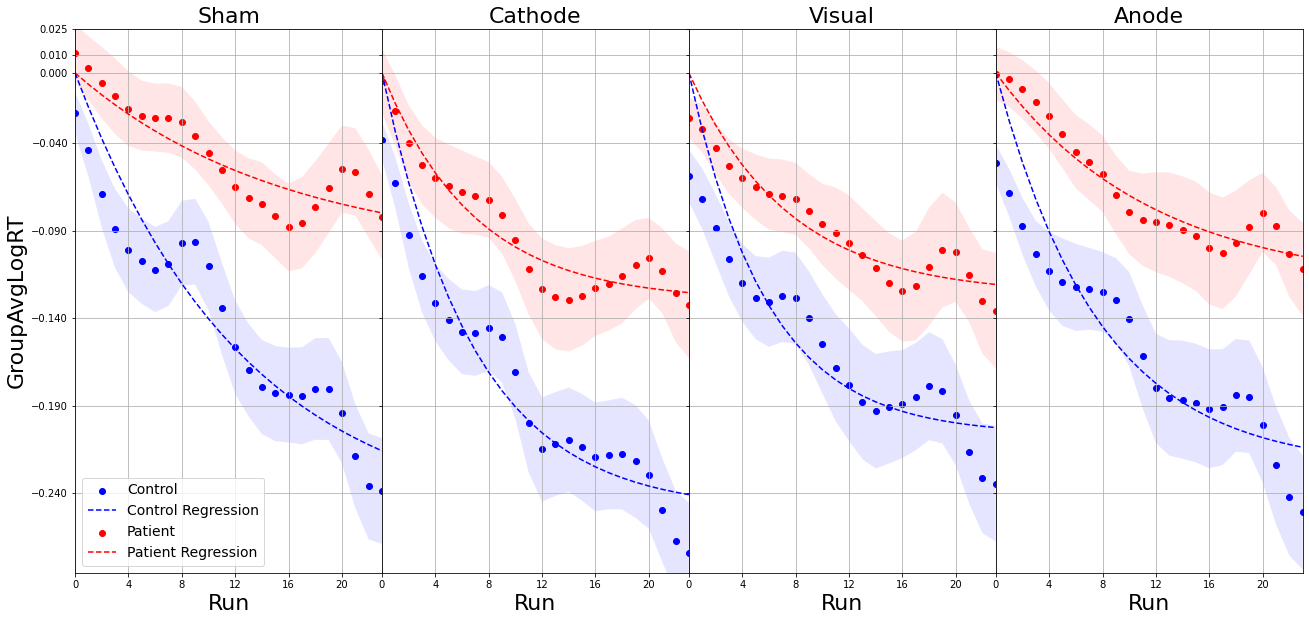

In [56]:
directory = "/Users/adish/Documents/NYPSI Research/TDCS-SRTT/data/NormalizedData/NormalizedWrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs"
def normFunc(x,K,plateau):
    y0 = 0
    #plateau = 0
    return (y0 - plateau) * np.exp(-K * x) + plateau
plotGroupAverages(normFunc,directory,addZero=True)

## Percent Fast Group Average Plots on Normalized Data

<ipython-input-5-04a19b70190d>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-5-04a19b70190d>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-5-04a19b70190d>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-5-04a19b70190d>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)
<ipython-input-5-04a19b70190d>:3: RuntimeWarning: invalid value encountered in log
  return plateau * np.log(k*x)


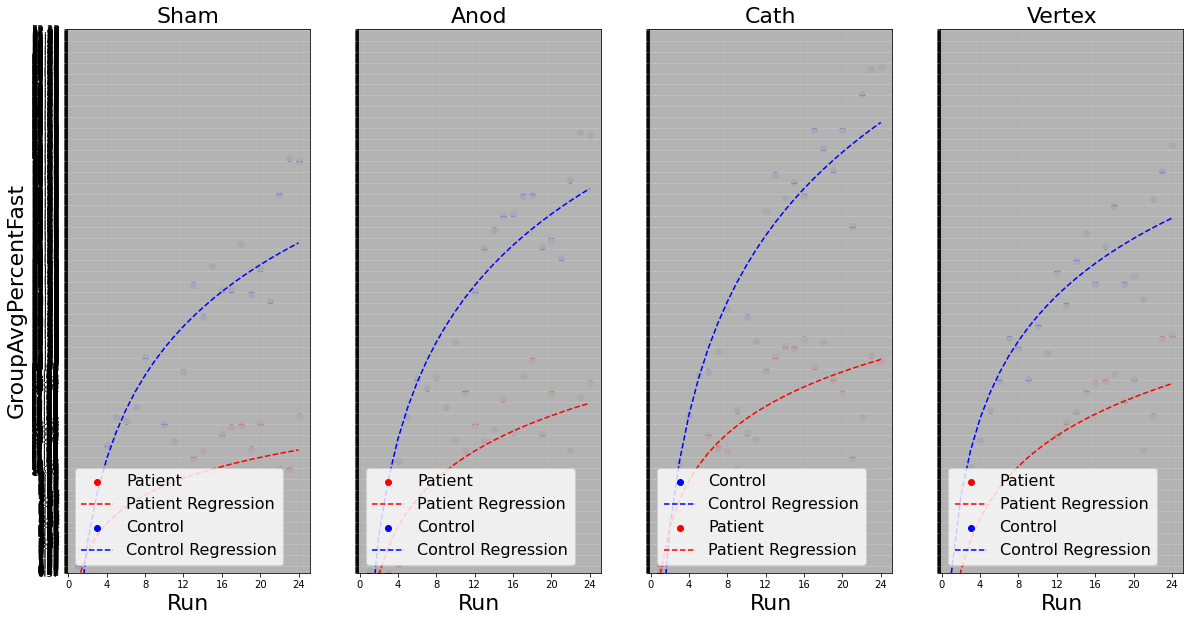

In [5]:
directory = "/Users/adish/Documents/NYPSI Research/TDCS-SRTT/data/NormalizedData/NormalizedWrangledData/SUBJECT_RUN/subjectRunAvgs/groupAverageLogRTs/PercentFastGroupAverages"
def percentFastFunc(x,plateau,k):
    return plateau * np.log(k*x)
plotGroupAverages(percentFastFunc,directory,column='GroupAvgPercentFast')